<h4 style="text-align: center;">Probability Distributions</h4>

In [14]:
# Imports

import math
import matplotlib.pyplot as plt
import numpy as np

#### Plotter

In [15]:
def plot_styler(ax, title='', xlabel='sample', ylabel='p'):
    ax.set_title(title, fontsize=9)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=8) 
    ax.set_xlabel(xlabel, fontsize=8)
    ax.set_ylabel(ylabel, fontsize=8)
    ax.legend(frameon=False, fontsize=7)
    plt.tight_layout()
    plt.show()

#### Bernoulli (discrete)

Bernoulli distribution is the discrete probability distribution of a random variable which takes the value $1$ with probability $p$ and the value $0$ with probability $q=1−p$. Less formally, it can be thought of as a model for the set of possible outcomes of any single experiment that asks a yes–no question. Bernoulli is a special cas of Binomial distribution with $n=1$

$\underline{PDF:}$
$$
f(k;p) = P(X=k) = p^k(1-p)^{1-k} = \begin{cases} p & \text{if  } k=1, \\q=1-p & \text{if  } k=0. \end{cases}
$$

$\underline{CDF:}$
$$
F(k;p) = P(X<=k) = \begin{cases} 0 & \text{if  } k<0, \\1-p & \text{if  } 0\leq k <1, \\1 & \text{if  } k>=1. \end{cases}
$$

$\underline{Mean:}$
$${E}[X] = \Pr(X=1) \cdot 1 + \Pr(X=0) \cdot 0 = p \cdot 1 + q \cdot 0 = p.$$

$\underline{Var:}$
$${Var}[X] = E(X^2) - E(X)^2 = p \cdot 1^2 + q \cdot 0^2 - p^2 = p-p^2 = p(1-p) = pq$$

In [16]:
X = [0,1]

def prob(x, p):
    return p**x*(1-p)**(1-x)

def cdf(x, p):
    if x<0: return 0
    elif x>=0 and x<1: return 1-p
    elif x>=1: return 1
    
ps = [0.3, 0.5, 0.9]
pdfs, cdfs = {}, {}

for p in ps:
    pdfs[str(p)] = [prob(x, p) for x in X]
    cdfs[str(p)] = [cdf(x, p) for x in X]

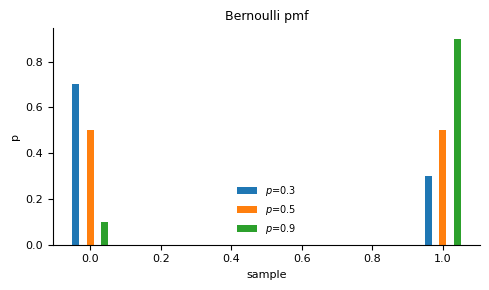

In [17]:
fig, ax = plt.subplots(figsize=(5,3))
delta = -0.04
for pdf in pdfs:
    ax.bar([x+delta for x in X], pdfs[pdf], width=0.02, label=fr'$p$={pdf}')
    delta += 0.04
plot_styler(ax, title='Bernoulli pmf')

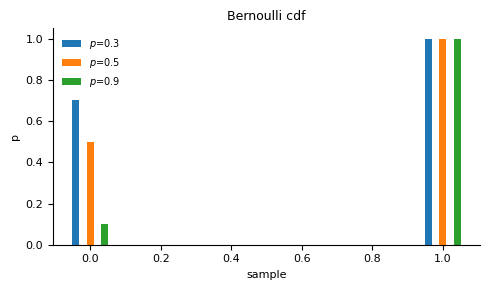

In [18]:
fig, ax = plt.subplots(figsize=(5,3))
delta = -0.04
for cdf in cdfs:
    ax.bar([x+delta for x in X], cdfs[cdf], width=0.02, label=fr'$p$={cdf}')
    delta += 0.04
plot_styler(ax, title='Bernoulli cdf')

#### Binomial (discrete)

The binomial distribution with parameters $n$ and $p$ is the discrete probability distribution of the number of successes in a sequence of $n$ independent experiments, each asking a yes–no question. So, it is the number of successes in a sequence of Bernoulli trials

$\underline{PDF:}$
$$f(k; n,p) = P(X=k) = \binom {n}{k} p^k(1-p)^{n-k} $$

$\underline{CDF:}$
$$F(k;n,p) = P(X \leq k) = \sum_{i=0}^{\lfloor k\rfloor} {n \choose i}p^{i}(1-p)^{n-i}$$

$\underline{Mean:}$
$$
\begin{align*}
\operatorname{E}[X] = \operatorname{E}[X_{1} + \cdots + X_{n}] = \operatorname{E}[X_{1}] + \cdots + \operatorname{E}[X_{n}] = np
\end{align*}
$$  

$\underline{Var:}$
$$
Similarly, 
\begin{align*}
Var[X] = np(1-p)
\end{align*}
$$  

In [19]:
X = [i for i in range(50)]

def prob(x,n,p):
    return math.comb(n,x) * p**x * (1-p)**(n-x)
def cdf(x,n,p):
    return sum([prob(x,n,p) for x in range(math.floor(x))])

n = 40
ps = [0.3, 0.5, 0.9]
pdfs, cdfs = {}, {}

for p in ps:
    pdfs[str(p)] = [prob(x,n,p) for x in X]
    cdfs[str(p)] = [cdf(x,n,p) for x in X]

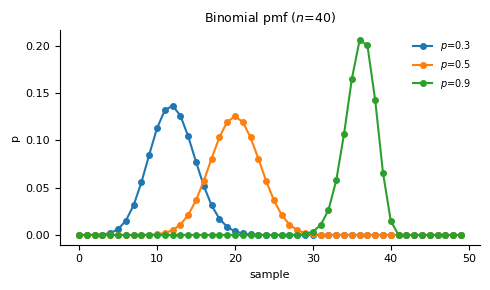

In [20]:
fig, ax = plt.subplots(figsize=(5,3))
for pdf in pdfs:
    ax.plot(X, pdfs[pdf], '-o', markersize=4, label=fr'$p$={pdf}')
plot_styler(ax, title=fr'Binomial pmf ($n$=40)')

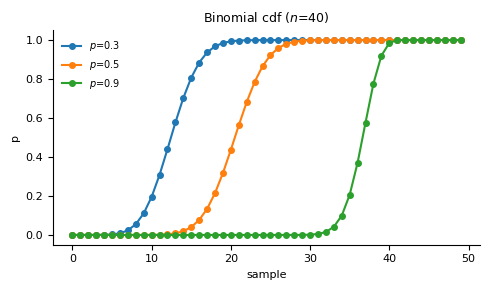

In [21]:
fig, ax = plt.subplots(figsize=(5,3))
for cdf in cdfs:
    ax.plot(X, cdfs[cdf], '-o', markersize=4, label=fr'$p$={cdf}')
plot_styler(ax, title=fr'Binomial cdf ($n$=40)')

#### Geometric (discrete)

The probability distribution of the number $X$ of Bernoulli trials needed to get one success, with success probability $p$

$\underline{PDF:}$
$$f(k; p) = P(X=k) = (1-p)^{k-1}p $$

$\underline{CDF:}$
$$F(k; p) = P(X \leq k) = \sum_{i=0}^{k-1} p(1-p)^{i}$$
Since in geometric series $\sum_{i=1}^{n} ar^{i-1} = a \frac{1-r^n}{1-r},$
$$F(k; p) = p \frac{1-(1-p)^k}{1-(1-p)} = 1-(1-p)^k$$

$\underline{Mean:}$
$$
\begin{align*}
\operatorname{E}[X] = \sum_{k=1}^{\infty} k(1-p)^{k-1}p = \frac{1}{p}
\end{align*}
$$  

$\underline{Var:}$
$$
\begin{align*}
Var[X] = \frac{1-p}{p^2}
\end{align*}
$$  

In [22]:
X = [i for i in range(1,10)]

def prob(x,p):
    return (1-p)**(x-1) * p
def cdf(x,p):
    return 1-(1-p)**x

ps = [0.1, 0.5, 0.7]
pdfs, cdfs = {}, {}

for p in ps:
    pdfs[str(p)] = [prob(x,p) for x in X]
    cdfs[str(p)] = [cdf(x,p) for x in X]

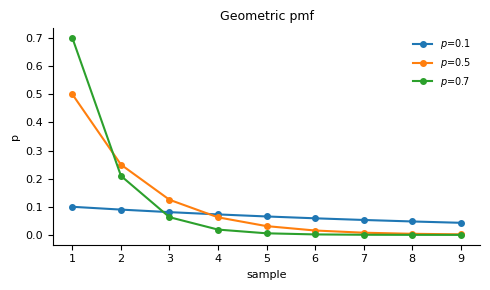

In [23]:
fig, ax = plt.subplots(figsize=(5,3))
for pdf in pdfs:
    ax.plot(X, pdfs[pdf], '-o', markersize=4, label=fr'$p$={pdf}')
plot_styler(ax, title=fr'Geometric pmf')

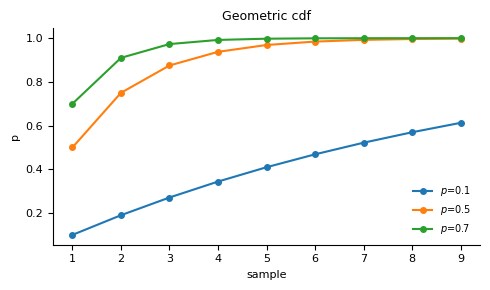

In [24]:
fig, ax = plt.subplots(figsize=(5,3))
for cdf in cdfs:
    ax.plot(X, cdfs[cdf], '-o', markersize=4, label=fr'$p$={cdf}')
plot_styler(ax, title=fr'Geometric cdf')

#### Poisson (discrete)

The Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time if these events occur with a known constant mean rate and independently of the time since the last event. The expected number of events per interval is $\lambda$ 

$\underline{PDF:}$
$$f(k; \lambda) = P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!} $$

$\underline{CDF:}$
$$F(k; \lambda) = P(X \leq k) = \sum_{i=0}^{k} \frac{\lambda^i e^{-\lambda}}{i!}$$

$\underline{Mean/Var:}$
$$
\begin{align*}
E(X) = Var(X) = \lambda
\end{align*}
$$  

If instead of $\lambda$ we are given the average rate at which events occur $r$, then 
$$f(k; \lambda) = P(X=k) = \frac{(rt)^k e^{-rt} }{k!} $$

In [25]:
X = [i for i in range(40)]

def prob(lmbda, x):
    return math.exp(-lmbda) * lmbda**x / math.factorial(x)
def cdf(lmbda, x):
    return sum([prob(lmbda, x) for x in range(x)])

lmbdas = [0.5, 1, 2, 3, 6, 10, 20]
pdfs, cdfs = {}, {}

for lmbda in lmbdas:
    pdfs[str(lmbda)] = [prob(lmbda, x) for x in X]
    cdfs[str(lmbda)] = [cdf(lmbda, x) for x in X]

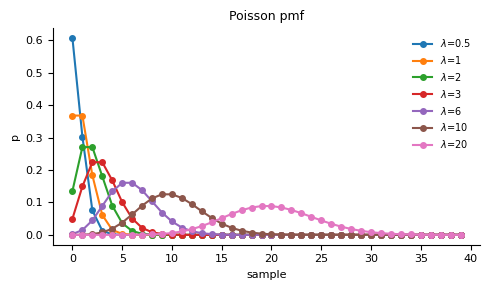

In [26]:
fig, ax = plt.subplots(figsize=(5,3))
for pdf in pdfs:
    ax.plot(X, pdfs[pdf], '-o', markersize=4, label=fr'$\lambda$={pdf}')
plot_styler(ax, title='Poisson pmf')

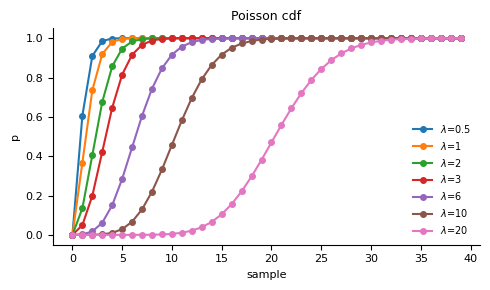

In [27]:
fig, ax = plt.subplots(figsize=(5,3))
for cdf in cdfs:
    ax.plot(X, cdfs[cdf], '-o', markersize=4, label=fr'$\lambda$={cdf}')
plot_styler(ax, title='Poisson cdf')

#### Exponential Distribution (continuous)

Used to model the time elapsed between events in a Poisson process, where events occur continuously and independently at a constant average rate. It is a special case of gamma distribution when the shape parameter $k$ is set to $1$ 

$\underline{PDF:}$
$$f_X(x) = \lambda e^{-\lambda x}, \text{where } x\geq0$$

$\underline{CDF:}$
$$F_X(x) = \int_{0}^{x} \lambda e^{-\lambda t} dt = 1 - e^{-\lambda x}$$

$\underline{Mean:}$
$$
\begin{align*}
\mu = E(x) = \int_{0}^{\infty} x f_X(x) dx = \int_{0}^{\infty} x \lambda e^{-\lambda x} dx
\end{align*}
$$  
$\qquad \text{Let } y=\lambda x, \text{then}$ 

$$
\begin{align*}
E(x) = \frac{1}{\lambda} \int_{0}^{\infty} y e^{-y} dy = \frac{1}{\lambda} \left[-e^{-y} - y e^{-y} \right]_{0}^{\infty}
= \frac{1}{\lambda}
\end{align*}
$$

$\underline{Var:}$
$$
\begin{align*}
E(X^2) &= \int_{0}^{\infty} x^2 \lambda e^{-\lambda x} dx \\
&= \frac{1}{\lambda^2} \int_{0}^{\infty} y^2 e^{-y} dy \\
&= \frac{1}{\lambda^2} \left[ -2e^{-y} - 2ye^{-y} - y^2 e^{-y} \right]_{0}^{\infty} \\
&= \frac{2}{\lambda^2}
\end{align*}
$$

$$
\text{Var}(X) = E[X^2] - (E[X])^2 = \frac{2}{\lambda^2} - \left(\frac{1}{\lambda}\right)^2 = \frac{1}{\lambda^2}
$$

In [28]:
X = np.linspace(0, 2, 1000)

def prob(lmda, x):
    return lmda * math.exp(-lmda*x)
def cdf(lmda, x):
    return 1-math.exp(-lmda*x)

lmdas = [0.1, 0.5, 1, 2, 10]
pdfs, cdfs = {}, {}
for lmda in lmdas:
    pdfs[str(lmda)] = [prob(lmda=lmda, x=x) for x in X]
    cdfs[str(lmda)] = [cdf(lmda=lmda, x=x) for x in X]

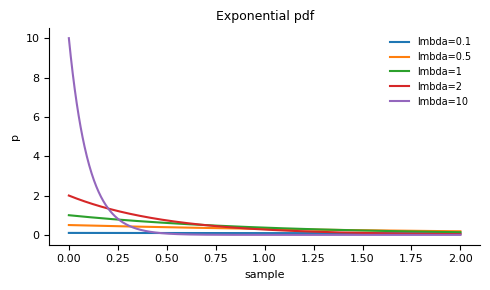

In [29]:
fig, ax = plt.subplots(figsize=(5,3))
for pdf in pdfs:
    ax.plot(X, pdfs[pdf], label=f'lmbda={pdf}')
plot_styler(ax, title='Exponential pdf')

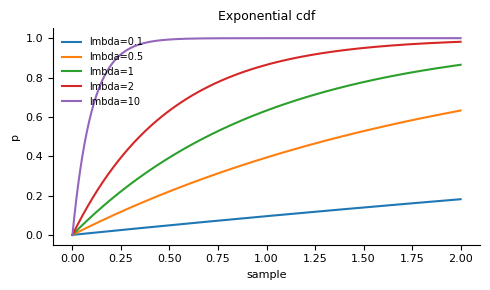

In [30]:
fig, ax = plt.subplots(figsize=(5,3))
for cdf in cdfs:
    ax.plot(X, cdfs[cdf], label=f'lmbda={cdf}')
plot_styler(ax, title='Exponential cdf')